# WASP-80b external data modelling: red noise

Hannu Parviainen, University of Oxford

This notebook covers the modelling of Triaud et al. (2013), Mancini et al. (2014), and Fukui et al. (2014) WASP-80b data assuming *red noise*. Red noise is modelled using Gaussian processes (GPs) with GP hyperparameters fixed to the values optimised in the two previous notebooks.

The main difference to the white noise modelling is the addition of 17 (mostly) NIR light curves observed by Fukui et al. The light curves come with auxiliary data (airmass, and the PSF centroid shifts in x and y) that allow us to model the systematics better than with the T13 and M14 datasets.

We start the optimisation from the parameter vector population of the final MCMC iteration of the corresponding white-noise model (ckwn, ckwn_ldtk, vkwn, vkwn_ldtk.)

**Note:** The number of walkers, DE iterations, and MCMC iterations (as well as MCMC thinning and burn-in) have been chosen based on many trial runs. The idea of this notebook is to *just work*. The posterior evaluation for the red noise model is slower than with the white-noise model, *even when we're not marginalising over the GP hyperparameters*, so the optimisation and sampling take significantly longer time.

In [1]:
%pylab inline 
from extcore import *
npop, niter_de, niter_mc = 150, 100, 10000

Populating the interactive namespace from numpy and matplotlib


## 1a Constant radius ratio

The white noise model parameter vector is constructed as

    [basic parameters] + [limb darkening] + [baseline] + [white noise]
        
so we can copy all the parameters up to the beginning of the baseline section, stored in `lpf._sbl`. The first part of the parameter vector doesn't change even though we have added the Fukui et al. 2014 dataset, since the number and ordering of passbands doesn't change.

In [11]:
lpf = LPFRN(use_ldtk=False, constant_k=True)
sampler_ck = Sampler('ckrn', lpf, npop, niter_de, niter_mc)
sampler_ck.de._population[:,:lpf._sbl] = pd.read_hdf(result_file, 'ckwn/mc').values[:,:lpf._sbl]

In [12]:
sampler_ck.sample(10000)

Traceback (most recent call last):
  File "/home/parviainen/.local/lib/python2.7/site-packages/emcee-2.1.0-py2.7.egg/emcee/ensemble.py", line 510, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "extcore.py", line 186, in __call__
    return self.lnposterior(pv)
  File "src/lpf.py", line 252, in lnposterior
    return lnp + self.lnlikelihood_ld(pv) + sum([lpf.lnlikelihood(pv) for lpf in self.lpfs])
  File "extcore.py", line 131, in lnlikelihood_rn
    return sum([gp.gp.lnlikelihood(fo-fm) for gp,fo,fm in zip(self.gps,self.fluxes,flux_m)])
  File "/home/parviainen/.local/lib/python2.7/site-packages/george-0.2.1-py2.7-linux-x86_64.egg/george/gp.py", line 233, in lnlikelihood
    ll = self._const - 0.5 * np.dot(r, self.solver.apply_inverse(r))
  File "/home/parviainen/.local/lib/python2.7/site-packages/george-0.2.1-py2.7-linux-x86_64.egg/george/basic.py", line 88, in apply_inverse
    return cho_solve(self._factor, y, overwrite_b=in_place)
  File "/home/parviainen/.loca

emcee: Exception while calling your likelihood function:
  params: [  1.25417596e+02   3.06785996e+00   4.13827631e+00   2.13797463e-01
   3.00068575e-02   4.26121441e-01   5.81680339e-01   4.07643677e-01
   4.79776934e-01   2.77467192e-01   3.15446555e-01   2.37381014e-01
   2.86336517e-01   5.61086236e-02   4.73308999e-01   2.97709202e-01
   3.87082331e-01   1.96504244e-01   4.55762277e-01   9.99984716e-01
   1.00013642e+00   1.00007801e+00   1.00002011e+00   9.99969962e-01
   1.00005261e+00   9.99906949e-01   9.99911690e-01   1.00008833e+00
   1.00026904e+00   9.99878217e-01   9.99918612e-01   9.99846147e-01
   9.99764856e-01   9.99787066e-01   1.00014390e+00   1.00006863e+00
   1.00005640e+00   1.00004099e+00   1.00000837e+00   1.00001366e+00
   9.99827920e-01   9.99985991e-01   9.99919193e-01   9.99877584e-01
   1.00015880e+00   1.00010357e+00   1.00009249e+00]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt


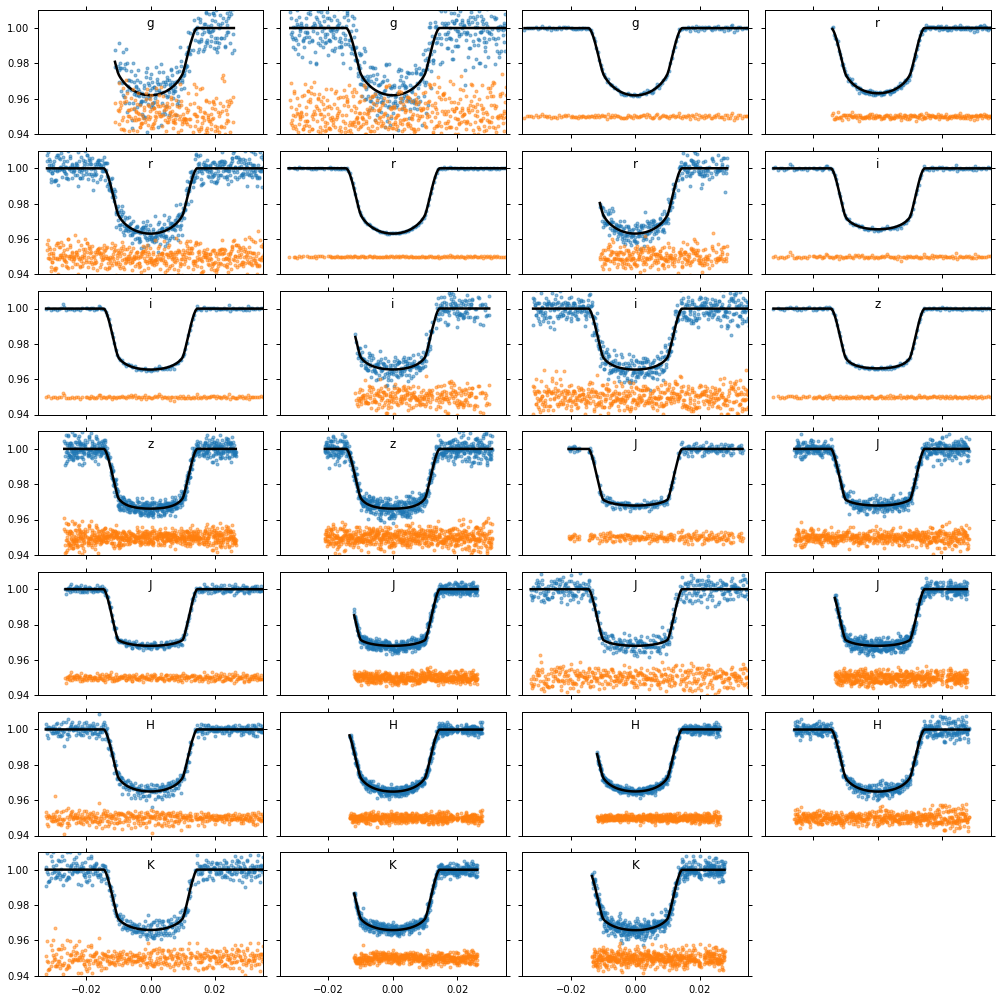

In [13]:
sampler_ck.plot();

In [36]:
sampler_ck.plot(show_systematics=True);

## 1b Constant radius ratio with LDTk

In [8]:
lpf = LPFRN(use_ldtk=True, constant_k=True)
sampler_ckld = Sampler('ckrn_ldtk', lpf, npop, niter_de, niter_mc)

In [9]:
sampler_ckld.sample(10000)

Traceback (most recent call last):
  File "/home/parviainen/.local/lib/python2.7/site-packages/emcee-2.1.0-py2.7.egg/emcee/ensemble.py", line 510, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "extcore.py", line 186, in __call__
    return self.lnposterior(pv)
  File "src/lpf.py", line 252, in lnposterior
    return lnp + self.lnlikelihood_ld(pv) + sum([lpf.lnlikelihood(pv) for lpf in self.lpfs])
  File "extcore.py", line 131, in lnlikelihood_rn
    return sum([gp.gp.lnlikelihood(fo-fm) for gp,fo,fm in zip(self.gps,self.fluxes,flux_m)])
  File "/home/parviainen/.local/lib/python2.7/site-packages/george-0.2.1-py2.7-linux-x86_64.egg/george/gp.py", line 233, in lnlikelihood
    ll = self._const - 0.5 * np.dot(r, self.solver.apply_inverse(r))
  File "/home/parviainen/.local/lib/python2.7/site-packages/george-0.2.1-py2.7-linux-x86_64.egg/george/basic.py", line 88, in apply_inverse
    return cho_solve(self._factor, y, overwrite_b=in_place)
  File "/home/parviainen/.loca

emcee: Exception while calling your likelihood function:
  params: [  1.25417581e+02   3.06785924e+00   3.91323978e+00   2.63073608e-01
   2.94323017e-02   8.33451390e-01   3.54805223e-01   5.38796620e-01
   4.00096661e-01   4.78840858e-01   1.75276964e-01   3.68739799e-01
   2.09301957e-01   2.80339693e-01   2.70324738e-01   2.27279461e-01
   2.35192526e-01   1.55450281e-01   2.36072551e-01   9.99675686e-01
   1.00012398e+00   1.00025933e+00   9.99849652e-01   1.00018783e+00
   9.99828931e-01   9.99996552e-01   9.99948062e-01   1.00003460e+00
   1.00016235e+00   9.99991600e-01   9.99812665e-01   1.00031357e+00
   9.99890624e-01   9.99817165e-01   9.99973838e-01   1.00005099e+00
   1.00009870e+00   1.00006266e+00   1.00005542e+00   1.00008577e+00
   1.00016292e+00   9.99872369e-01   1.00010617e+00   1.00001707e+00
   1.00008083e+00   1.00001069e+00   9.99951893e-01]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt


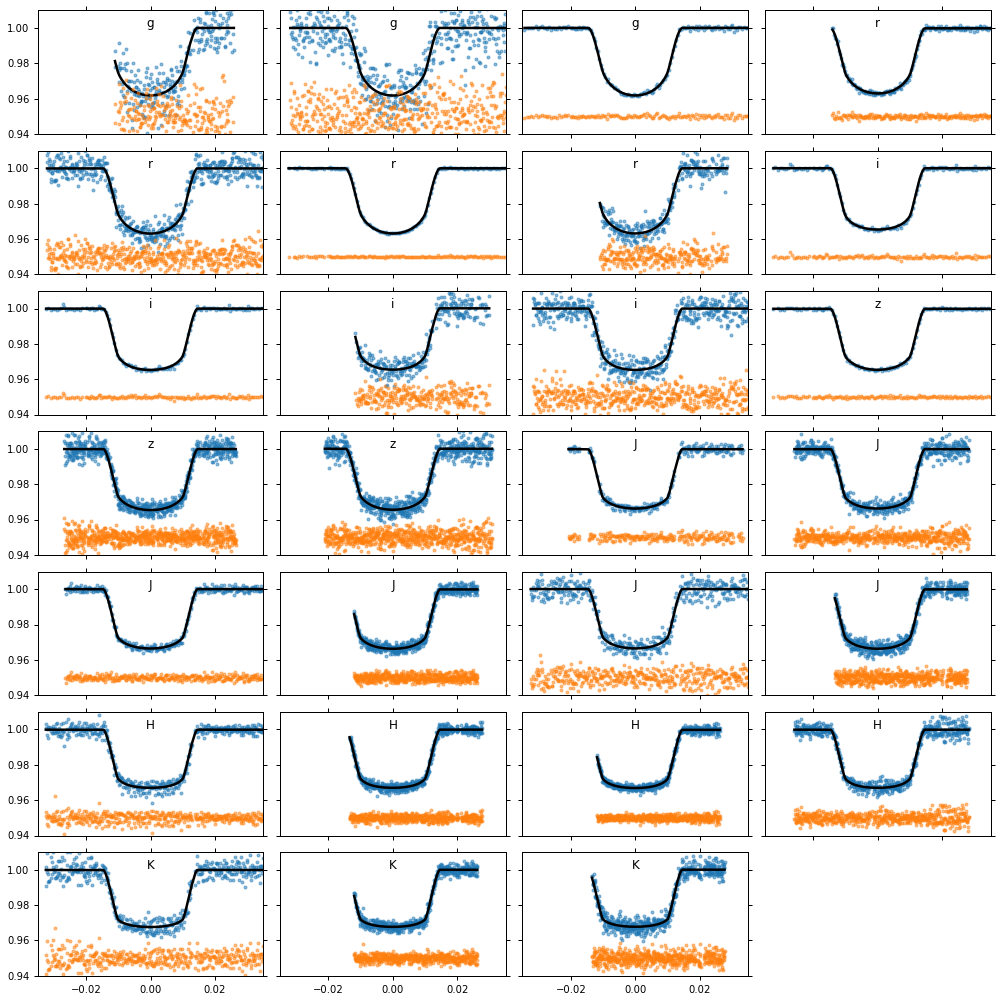

In [10]:
sampler_ckld.plot();

## 2a Wavelength-dependent radius ratio

In [2]:
lpf = LPFRN(use_ldtk=False, constant_k=False)
sampler_vk = Sampler('vkrn', lpf, npop, niter_de, niter_mc)
#sampler_vk.de._population[:,:lpf._sbl] = pd.read_hdf(result_file, 'vkwn/mc').values[:,:lpf._sbl]

In [3]:
pvp = pd.read_hdf(result_file, 'vkwn/mc').values[:,:lpf._sbl]

In [5]:
sampler_vk.de._population[:,:4] = pvp[:,:4]
sampler_vk.de._population[:,lpf.iq1] = pvp[:,lpf.iq1]
sampler_vk.de._population[:,lpf.iq2] = pvp[:,lpf.iq2]

In [6]:
sampler_vk.optimise(150)

In [6]:
sampler_vk.sample(10000)

In [15]:
sampler_vk.sampler.chain.shape

(150, 0, 53)

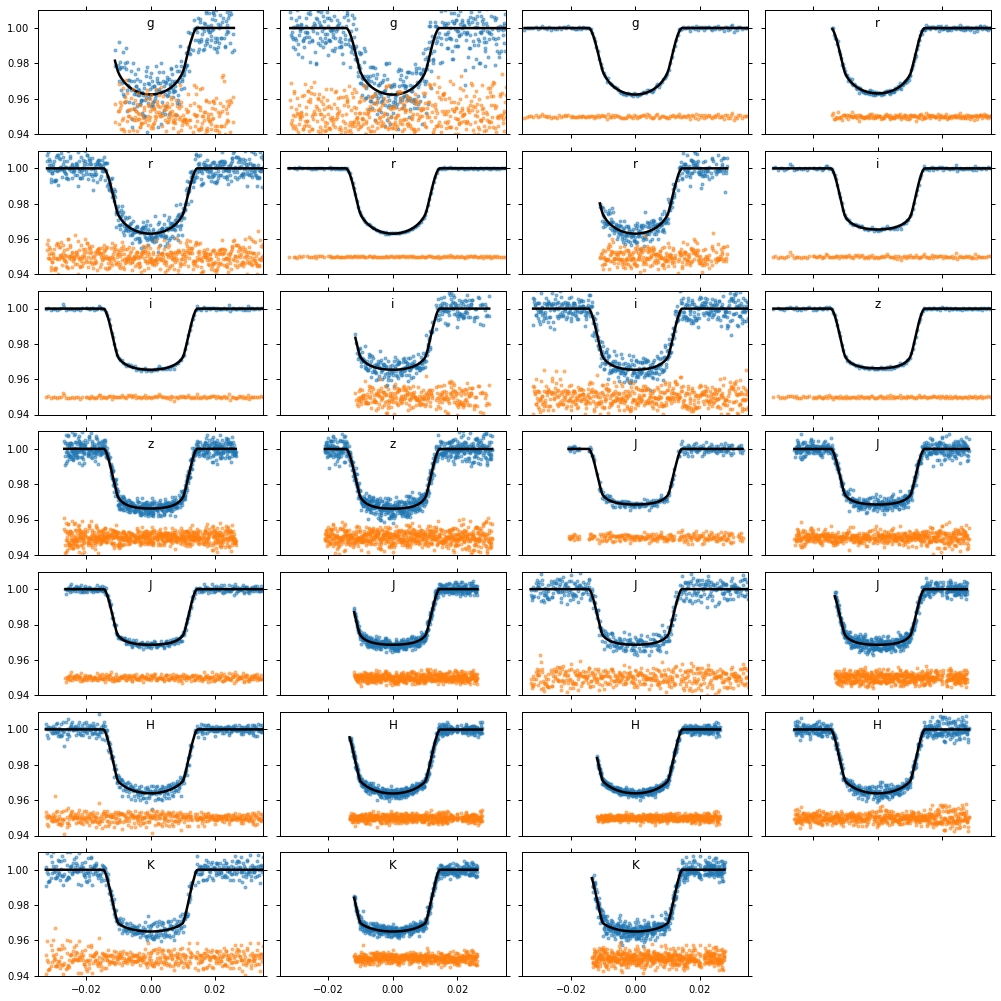

In [7]:
sampler_vk.plot();

## 2b Wavelength-dependent radius ratio with LDTk

In [2]:
lpf = LPFRN(use_ldtk=True, constant_k=False)
sampler_vkld = Sampler('vkrn_ldtk', lpf, npop, niter_de, niter_mc)
sampler_vkld.de._population[:,:lpf._sbl] = pd.read_hdf(result_file, 'vkwn_ldtk/mc').values[:,:lpf._sbl]

In [3]:
sampler_vkld.sample(10000)

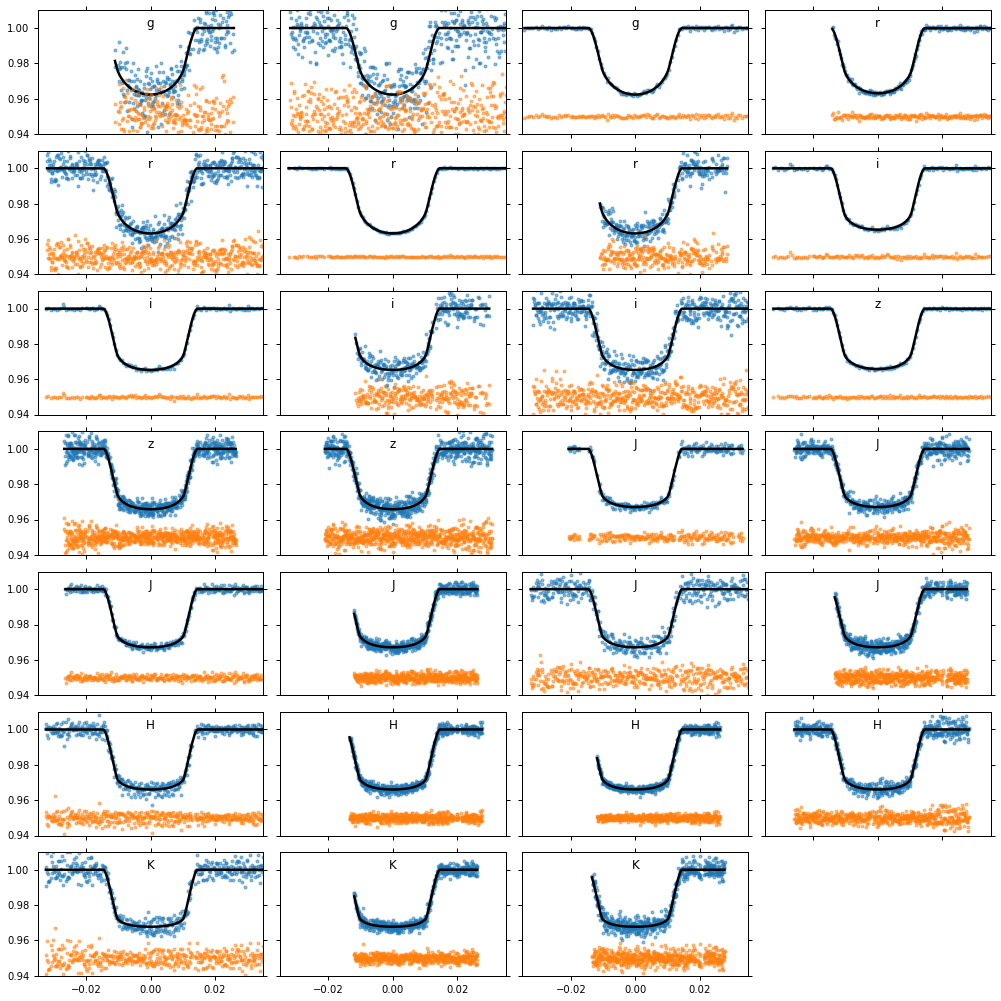

In [4]:
sampler_vkld.plot();

---

<center> &copy; 2016 <a href="mailto:hannu.parviainen@physics.ox.ac.uk">Hannu Parviainen</a></center>